# Exercise 9

### Construct a table where each row represents the measures of a network.

The following measures will be calculated:<br>
1 - Number of Nodes.<br>
2 - Average Degree.<br>
3 - Second moment (variance) of degree distribution.<br>
4 - Average clustering coefficient (Avg CC).<br>
5 - Transitivity.<br>
6 - Average shortest path length (Avg SPL).<br>
7 - Diameter.<br>

Importing essencial libraries, and defining the functions needed for the measures.(The measures 4, 5, 6 and 7 are already defined in nx library, but functions for 6 and 7 were defined, as they need to be applied to a connected graph).

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
from numpy import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
def degreeDistribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues = arange(0,maxk+1)
    Pk = np.zeros(maxk+1) #create an array of zeros for counting the degree distribution
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) #converting the values to probabilities
    return kvalues,Pk    

In [3]:
def varianceDegreeDistribution(G):
    k,Pk = degreeDistribution(G)
    var = sum((k**2)*Pk) - (sum(k*Pk))**2
    return var

In [4]:
def avgDegree(G):
    return G.number_of_edges()/float(2 * G.number_of_nodes())

In [5]:
def avgSPL(G): #average_shortest_path_length
    Gc = max(nx.connected_component_subgraphs(G), key=len)
    return nx.average_shortest_path_length(Gc)

In [6]:
def Diameter(G): #average_shortest_path_length
    Gc = max(nx.connected_component_subgraphs(G), key=len)
    return nx.diameter(Gc)

In [7]:
start = time.time()

In [9]:

array = np.zeros((7,4))

G = nx.read_edgelist("euroroad.txt")
Array = np.zeros(7)
Array[0] = G.number_of_nodes()
Array[1] = avgDegree(G)
Array[2] = varianceDegreeDistribution(G)
Array[3] = nx.average_clustering(G)
Array[4] = nx.transitivity(G)
Array[5] = avgSPL(G)
Array[6] = Diameter(G)
array[:,0] = Array

G = nx.read_edgelist("facebookEx5.txt")
Array = np.zeros(7)
Array[0] = G.number_of_nodes()
Array[1] = avgDegree(G)
Array[2] = varianceDegreeDistribution(G)
Array[3] = nx.average_clustering(G)
Array[4] = nx.transitivity(G)
Array[5] = avgSPL(G)
Array[6] = Diameter(G)
array[:,1] = Array

G = nx.read_edgelist("vidal_protein.txt")
Array = np.zeros(7)
Array[0] = G.number_of_nodes()
Array[1] = avgDegree(G)
Array[2] = varianceDegreeDistribution(G)
Array[3] = nx.average_clustering(G)
Array[4] = nx.transitivity(G)
Array[5] = avgSPL(G)
Array[6] = Diameter(G)
array[:,2] = Array

G = nx.read_edgelist("petsterhamsters.txt")
Array = np.zeros(7)
Array[0] = G.number_of_nodes()
Array[1] = avgDegree(G)
Array[2] = varianceDegreeDistribution(G)
Array[3] = nx.average_clustering(G)
Array[4] = nx.transitivity(G)
Array[5] = avgSPL(G)
Array[6] = Diameter(G)
array[:,3] = Array

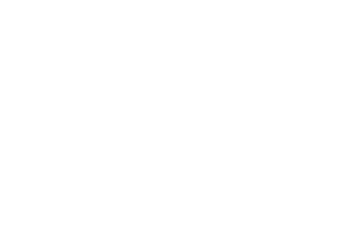

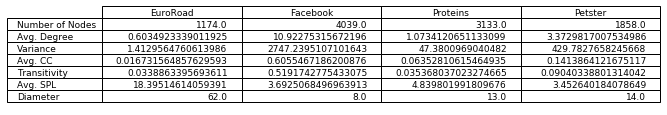

In [10]:


columns = ['EuroRoad','Facebook','Proteins','Petster']
rows = ['Number of Nodes','Avg. Degree','Variance','Avg. CC','Transitivity','Avg. SPL','Diameter']

plt.axis('off')
plt.axis('tight')

#plt.table(array,colLabels = columns,cel)

nrows, ncols = array.shape[0], len(columns)
hcell, wcell = 0.3, 1.
hpad, wpad = 0, 0    
fig=plt.figure(figsize=(10,0.1))
ax = fig.add_subplot(111)
ax.axis('off')

#do the table
the_table = ax.table(cellText = array,colLabels=columns,rowLabels=rows, loc='top')
plt.savefig("table.png")

In [11]:
end = time.time()
print("time elapsed: ", end - start)

time elapsed:  3235.5216500759125


It's possible to see that for being a geometric network, Euroroad has the lowest average degree, variance, clustering coefficient and transitivity. For the same reason, it has the biggest diameter and Avg. SPL.<br>
Now, comparing the social networks Facebook and Petster, it's clear that users of Facebook tend to have more friends according with their Avg. degree and have a bigger tendency to form groups by its Avg. CC. Also, there're more popular people on Facebook, as we can see by the higher variance of its network.<br>
One observation that can be made about the human protein's network is the existence of some proteins with high number of interactions, which can be predicted by the high variance compared to its Avg. Degree. 